In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/anime-vs-cartoon-vs-human/Data/cartoon/2 (31).png
/kaggle/input/anime-vs-cartoon-vs-human/Data/cartoon/10 (50).png
/kaggle/input/anime-vs-cartoon-vs-human/Data/cartoon/11 (31).png
/kaggle/input/anime-vs-cartoon-vs-human/Data/cartoon/16 (35).png
/kaggle/input/anime-vs-cartoon-vs-human/Data/cartoon/5 (58).jpg
/kaggle/input/anime-vs-cartoon-vs-human/Data/cartoon/32 (40).png
/kaggle/input/anime-vs-cartoon-vs-human/Data/cartoon/11 (39).png
/kaggle/input/anime-vs-cartoon-vs-human/Data/cartoon/5 (6).jpg
/kaggle/input/anime-vs-cartoon-vs-human/Data/cartoon/20 (41).png
/kaggle/input/anime-vs-cartoon-vs-human/Data/cartoon/25 (46).png
/kaggle/input/anime-vs-cartoon-vs-human/Data/cartoon/22 (12).png
/kaggle/input/anime-vs-cartoon-vs-human/Data/cartoon/15 (47).png
/kaggle/input/anime-vs-cartoon-vs-human/Data/cartoon/2 (1).png
/kaggle/input/anime-vs-cartoon-vs-human/Data/cartoon/173.png
/kaggle/input/anime-vs-cartoon-vs-human/Data/cartoon/29 (12).png
/kaggle/input/anime-vs-cartoon-vs-h

### 🚩 프로젝트 주제   

<img src='./images/banner_cartoon.png' width="700px">

#### Anime(일본풍 작화)인지 Cartoon(서양풍 작화)인지 Human인지 이미지 분류

### 📌 Default Setting
> 🔗 Image Size : 150
>
> 🔗 Batch Size : 32
>

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = 150
BATCH_SIZE = 32

idg = ImageDataGenerator()

original_dir = '/kaggle/input/anime-vs-cartoon-vs-human/Data'
original_generator = idg.flow_from_directory(original_dir,
                                            target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                            batch_size=BATCH_SIZE,
                                            class_mode='categorical',
                                            shuffle=True)

print(original_generator.class_indices)

Found 8917 images belonging to 3 classes.
{'anime': 0, 'cartoon': 1, 'human': 2}


#### 📌 Target Data (종속변수) 설정  
> 0: 'anime', 1: 'cartoon', 2: 'human'
>
> 총 3개의 클래스가 있는 다중분류 데이터
>
> 위 설정을 통해 디렉토리에서 이미지를 읽어와서 모델 학습에 사용할 수 있는 형태로 변환해주는 ImageDataGenerator를 이용하여 데이터 생성기를 만듭니다.

In [5]:
target_name = {v : k for k, v in original_generator.class_indices.items()}
target_name

{0: 'anime', 1: 'cartoon', 2: 'human'}

In [3]:
# Data Frame 타겟 이름 설정 

original_target_names = []

for target in original_generator.classes :
    original_target_names.append(target_name[target])


#### 📌 데이터 프레임 생성 및 경로 수정

In [7]:
import pandas as pd

original_df = pd.DataFrame({'file_paths': original_generator.filepaths, 'target_names': original_target_names, 'targets': original_generator.classes})
original_df.file_paths = original_df.file_paths.apply(lambda file_path: file_path.replace('\\', '/'))

display(original_df)

file_paths target_names  targets
0     /kaggle/input/anime-vs-cartoon-vs-human/Data/a...        anime        0
1     /kaggle/input/anime-vs-cartoon-vs-human/Data/a...        anime        0
2     /kaggle/input/anime-vs-cartoon-vs-human/Data/a...        anime        0
3     /kaggle/input/anime-vs-cartoon-vs-human/Data/a...        anime        0
4     /kaggle/input/anime-vs-cartoon-vs-human/Data/a...        anime        0
...                                                 ...          ...      ...
8912  /kaggle/input/anime-vs-cartoon-vs-human/Data/h...        human        2
8913  /kaggle/input/anime-vs-cartoon-vs-human/Data/h...        human        2
8914  /kaggle/input/anime-vs-cartoon-vs-human/Data/h...        human        2
8915  /kaggle/input/anime-vs-cartoon-vs-human/Data/h...        human        2
8916  /kaggle/input/anime-vs-cartoon-vs-human/Data/h...        human        2

[8917 rows x 3 columns]

#### 📌 Train, Test , Validation 각각의 데이터 분리

In [8]:
from sklearn.model_selection import train_test_split

train_images, test_images, train_targets, test_targets = \
train_test_split(original_df.file_paths, 
                 original_df.targets, 
                 stratify=original_df.targets, 
                 test_size=0.2, random_state=124)

print(train_targets.value_counts())
print(test_targets.value_counts())

targets
0    2403
2    2400
1    2330
Name: count, dtype: int64
targets
0    601
2    600
1    583
Name: count, dtype: int64


In [9]:
from sklearn.model_selection import train_test_split

train_images, validation_images, train_targets, validation_targets = \
train_test_split(train_images, 
                 train_targets, 
                 stratify=train_targets, 
                 test_size=0.2, random_state=124)

print(validation_targets.value_counts())

targets
0    481
2    480
1    466
Name: count, dtype: int64


In [10]:
train_df = original_df.loc[train_images.index].reset_index(drop=True)
validation_df = original_df.loc[validation_images.index].reset_index(drop=True)
test_df = original_df.loc[test_images.index].reset_index(drop=True)

print(train_df.shape[0])
print(validation_df.shape[0])
print(test_df.shape[0])

5706
1427
1784


In [16]:
train_df

file_paths target_names  targets
0     /kaggle/input/anime-vs-cartoon-vs-human/Data/c...      cartoon        1
1     /kaggle/input/anime-vs-cartoon-vs-human/Data/a...        anime        0
2     /kaggle/input/anime-vs-cartoon-vs-human/Data/c...      cartoon        1
3     /kaggle/input/anime-vs-cartoon-vs-human/Data/h...        human        2
4     /kaggle/input/anime-vs-cartoon-vs-human/Data/h...        human        2
...                                                 ...          ...      ...
5701  /kaggle/input/anime-vs-cartoon-vs-human/Data/h...        human        2
5702  /kaggle/input/anime-vs-cartoon-vs-human/Data/c...      cartoon        1
5703  /kaggle/input/anime-vs-cartoon-vs-human/Data/h...        human        2
5704  /kaggle/input/anime-vs-cartoon-vs-human/Data/a...        anime        0
5705  /kaggle/input/anime-vs-cartoon-vs-human/Data/c...      cartoon        1

[5706 rows x 3 columns]

#### ✏️ Train, Validation, Test 데이터프레임 정보 담은 폴더 생성

In [17]:
import pandas as pd
import shutil
import os



# 파일 경로 리스트를 추출.
train_image = train_df['file_paths'].tolist()

# 데이터의 기본 디렉토리와 목적지 디렉토리를 정의.
base_dir = '/kaggle/input/anime-vs-cartoon-vs-human'
dest_base_dir = '/kaggle/working/train/'

# 목적지 기본 디렉토리가 존재하는지 확인하고, 없으면 생성.
os.makedirs(dest_base_dir, exist_ok=True)

for filepath in train_image:
    # 목적지 디렉토리를 계산.
    destination_dir = dest_base_dir + filepath[len(base_dir + '/Data'):filepath.rindex('/')]
    
    # 목적지 디렉토리가 존재하는지 확인하고, 없으면 생성.
    os.makedirs(destination_dir, exist_ok=True)
    
    # 파일을 목적지 디렉토리로 복사.
    shutil.copy2(filepath, destination_dir)


In [18]:
import pandas as pd
import shutil
import os



# 파일 경로 리스트를 추출.
val_image = validation_df['file_paths'].tolist()

# 데이터의 기본 디렉토리와 목적지 디렉토리를 정의.
base_dir = '/kaggle/input/anime-vs-cartoon-vs-human'
dest_base_dir = '/kaggle/working/validation/'

# 목적지 기본 디렉토리가 존재하는지 확인하고, 없으면 생성.
os.makedirs(dest_base_dir, exist_ok=True)

for filepath in val_image:
    # 목적지 디렉토리를 계산.
    destination_dir = dest_base_dir + filepath[len(base_dir + '/Data'):filepath.rindex('/')]
    
    # 목적지 디렉토리가 존재하는지 확인하고, 없으면 생성.
    os.makedirs(destination_dir, exist_ok=True)
    
    # 파일을 목적지 디렉토리로 복사.
    shutil.copy2(filepath, destination_dir)

In [19]:
import pandas as pd
import shutil
import os



# 파일 경로 리스트를 추출.
test_image = test_df['file_paths'].tolist()

# 데이터의 기본 디렉토리와 목적지 디렉토리를 정의.
base_dir = '/kaggle/input/anime-vs-cartoon-vs-human'
dest_base_dir = '/kaggle/working/test/'

# 목적지 기본 디렉토리가 존재하는지 확인하고, 없으면 생성.
os.makedirs(dest_base_dir, exist_ok=True)

for filepath in test_image:
    # 목적지 디렉토리를 계산.
    destination_dir = dest_base_dir + filepath[len(base_dir + '/Data'):filepath.rindex('/')]
    
    # 목적지 디렉토리가 존재하는지 확인하고, 없으면 생성.
    os.makedirs(destination_dir, exist_ok=True)
    
    # 파일을 목적지 디렉토리로 복사.
    shutil.copy2(filepath, destination_dir)

### 🏞️ 이미지 시각화 

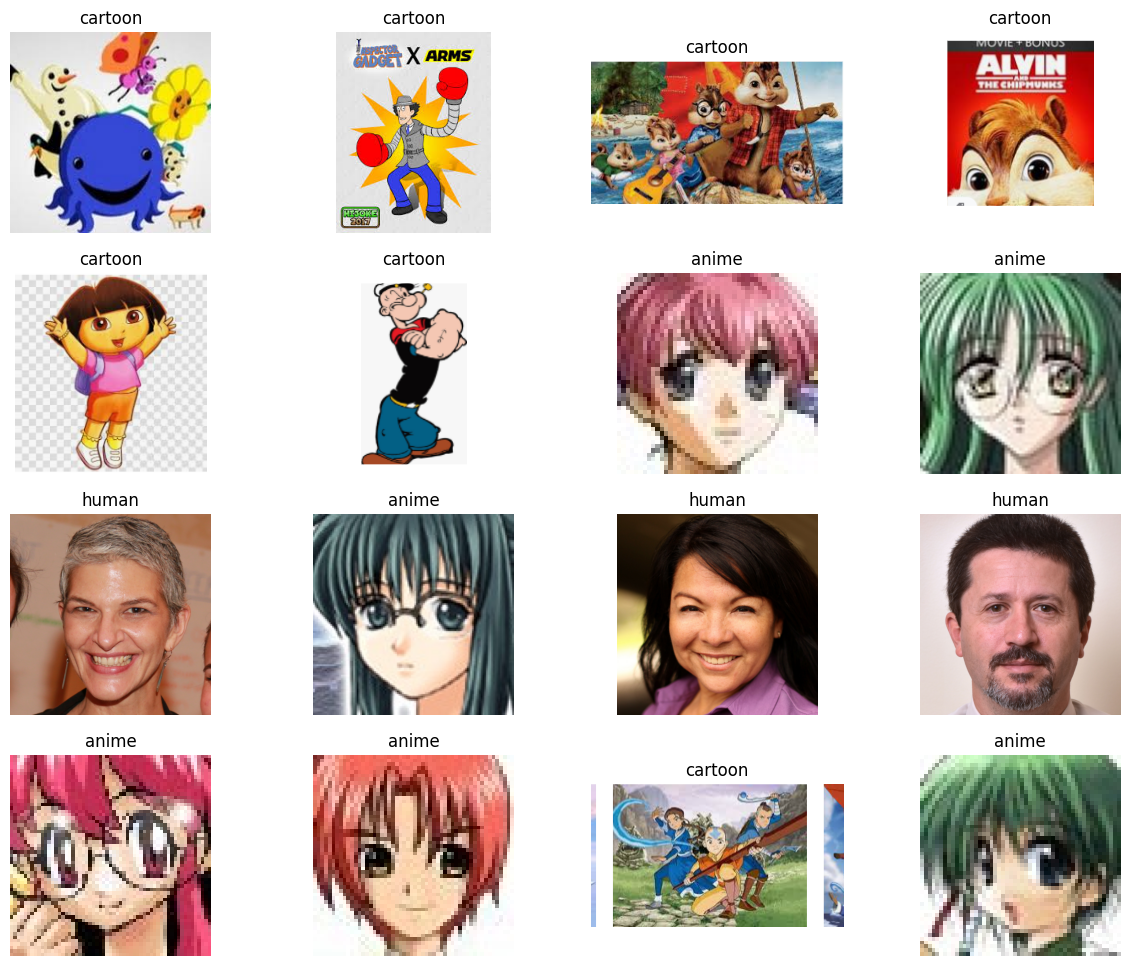

In [20]:
from PIL import Image
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 12))
for i, row in validation_df.sample(n=16).reset_index().iterrows():
    plt.subplot(4, 4, i + 1)
    image_path = row['file_paths']
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(row["target_names"])
    plt.axis('off')
plt.show()

#### 🔗 해당 데이터세트 내에 있는 카툰(미국풍 작화) , 애니메이션(일본풍 작화) , 인간의 이미지에 대한 이미지들을 시각화 하였습니다.

### ✨ 데이터프레임으로 전달받은 DataGenerator 생성 및 사전 훈련 모델 (EfficientNet) 전처리 적용

In [11]:
from tensorflow.keras.applications.efficientnet import preprocess_input

IMAGE_SIZE = 150
BATCH_SIZE = 32

train_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
validation_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

train_flow = train_generator.flow_from_dataframe(dataframe=
                                                train_df,
                                                x_col='file_paths',
                                                y_col='target_names',
                                                target_size = (IMAGE_SIZE, IMAGE_SIZE),
                                                batch_size=BATCH_SIZE,
                                                class_mode='categorical',
                                                shuffle=True)


validation_flow = validation_generator.flow_from_dataframe(dataframe=
                                                validation_df,
                                                x_col='file_paths',
                                                y_col='target_names',
                                                target_size = (IMAGE_SIZE, IMAGE_SIZE),
                                                batch_size=BATCH_SIZE,
                                                class_mode='categorical',
                                               )

test_flow = test_generator.flow_from_dataframe(dataframe=
                                                test_df,
                                                x_col='file_paths',
                                                y_col='target_names',
                                                target_size = (IMAGE_SIZE, IMAGE_SIZE),
                                                batch_size=BATCH_SIZE,
                                                class_mode='categorical',
                                                )
print(train_flow.class_indices)
print(validation_flow.class_indices)
print(test_flow.class_indices)

Found 5706 validated image filenames belonging to 3 classes.
Found 1427 validated image filenames belonging to 3 classes.
Found 1784 validated image filenames belonging to 3 classes.
{'anime': 0, 'cartoon': 1, 'human': 2}
{'anime': 0, 'cartoon': 1, 'human': 2}
{'anime': 0, 'cartoon': 1, 'human': 2}


### 📌 Keras 내의 Sequence를 상속받은 커스텀 데이터셋 클래스 구현

In [12]:
import numpy as np
from tensorflow.keras.utils import Sequence
from sklearn.utils import shuffle
import cv2

IMAGE_SIZE = 150
BATCH_SIZE = 32


class Dataset(Sequence):
    def __init__(self, file_paths, targets, batch_size=BATCH_SIZE, aug=None, preprocess=None, shuffle=False):
        self.file_paths = file_paths
        self.targets = targets
        self.batch_size = batch_size
        self.aug = aug
        self.preprocess = preprocess
        self.shuffle = shuffle

        if self.shuffle:
            self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.targets) / self.batch_size))

    # batch_size 단위로 이미지 배열과 타켓 데이터들을 가져온 뒤 변환한 값을 리턴한다.
    def __getitem__(self, index):
        file_paths_batch = self.file_paths[index * self.batch_size: (index + 1) * self.batch_size]
        targets_batch = self.targets[index * self.batch_size: (index + 1) * self.batch_size]

        results_batch = np.zeros((file_paths_batch.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

        for i in range(file_paths_batch.shape[0]):
            image = cv2.cvtColor(cv2.imread(file_paths_batch[i]), cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))

            if self.aug is not None:
                image = self.aug(image=image)['image']

            if self.preprocess is not None:
                image = self.preprocess(image)
                    
            results_batch[i] = image

        return results_batch, targets_batch
        
    def on_epoch_end(self):
        if self.shuffle:
            self.file_paths, self.targets = shuffle(self.file_paths, self.targets)   

이 코드는 Keras의 `Sequence` 클래스를 상속받아 커스텀 데이터셋 클래스를 구현한 것입니다. 이를 통해 배치 단위로 이미지 데이터를 효율적으로 불러오고, 필요에 따라 데이터 증강 및 전처리도 수행할 수 있습니다. 주요 기능은 다음과 같습니다:

- **데이터 초기화**: 파일 경로, 타겟, 배치 크기, 데이터 증강 함수, 전처리 함수, 셔플 옵션을 설정합니다.
- **배치 처리**: 배치 단위로 데이터를 불러오고, 이미지 데이터를 읽어와 전처리 및 증강을 수행합니다.
- **에포크 종료 시 셔플**: 셔플이 활성화된 경우, 에포크가 끝날 때마다 데이터를 섞습니다.

이 클래스를 사용하면 Keras 모델 학습 과정에서 데이터 로딩과 전처리를 효율적으로 처리할 수 있습니다.

### 💡 Train, Test, Validation DataFrame을 위의 Dataset 클래스에 적용

In [24]:
import albumentations as A
from tensorflow.keras.applications.efficientnet import preprocess_input


train_file_paths = train_df['file_paths'].values
# train_targets = train_df['targets'].values # SparseCategoricalCrossEntropy
train_targets = pd.get_dummies(train_df['targets']).values # CategoricalCrossEntropy

validation_file_paths = validation_df['file_paths'].values
# validation_targets = validation_df['targets'].values # SparseCategoricalCrossEntropy
validation_targets = pd.get_dummies(validation_df['targets']).values # CategoricalCrossEntropy

test_file_paths = test_df['file_paths'].values
# test_targets = test_df['targets'].values # SparseCategoricalCrossEntropy
test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy

# aug = A.Compose([
#     A.ShiftScaleRotate(p=0.5),
#     A.HorizontalFlip(p=0.5),
# ])

train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
#                         aug=aug, 
                        preprocess=preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=preprocess_input)

### 💡 1 Cycle  
> 사전 훈련 모델 --> Efficent Net으로 작업 (성능검증을 통해 해당 데이터세트와의 유사도 검증)

In [15]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import EfficientNetB3

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'efficentnet':
        model = EfficientNetB3(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(500, activation='relu')(x) # 해당 데이터세트 내의 이미지들이 고해상도 이미지 였기에, 
                                         # Unit(유닛 or 뉴런)수를 500으로 높게 설정하였습니다.
    if model_name != 'vgg16':
        x = Dropout(rate=0.3)(x)
    output = Dense(3, activation='softmax', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [16]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model = create_model(model_name='efficentnet', verbose=True)
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 150, 150,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 150, 150,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 150, 150,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 151, 151,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 75, 75,    │      1,080 │ stem_conv_pad[0]… │
│                     │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 75, 75,    │        160 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 75, 75,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 75, 75,    │        360 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 75, 75,    │        160 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 75, 75,    │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 40)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 40)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 10)  │        410 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 40)  │        440 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 75, 75,    │          0 │ block1a_activati… │
│ (Multiply)          │ 40)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 75, 75,    │        960 │ block1a_se_excit

 Total params: 11,553,538 (44.07 MB)

 Trainable params: 11,466,235 (43.74 MB)

 Non-trainable params: 87,303 (341.03 KB)

In [17]:
import gc
gc.collect()

2262

In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=4,
    mode='min'
)

In [19]:
N_EPOCHS = 10

history = model.fit(train_dataset, 
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1717572362.605686     121 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


179/179 ━━━━━━━━━━━━━━━━━━━━ 408s 1s/step - acc: 0.9411 - loss: 0.1521 - val_acc: 0.9979 - val_loss: 0.0248 - learning_rate: 0.0010
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 109s 589ms/step - acc: 0.9890 - loss: 0.0342 - val_acc: 0.9937 - val_loss: 0.0286 - learning_rate: 0.0010
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 109s 589ms/step - acc: 0.9969 - loss: 0.0229 - val_acc: 0.9909 - val_loss: 0.0701 - learning_rate: 0.0010
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 110s 595ms/step - acc: 0.9962 - loss: 0.0091 - val_acc: 0.9993 - val_loss: 0.0019 - learning_rate: 1.0000e-04
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 110s 598ms/step - acc: 0.9987 - loss: 0.0029 - val_acc: 0.9993 - val_loss: 9.3159e-04 - learning_rate: 1.0000e-04
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 109s 584ms/step - acc: 0.9982 - loss: 0.0096 - val_acc: 0.9986 - val_loss: 0.0030 - learning_rate: 1.0000e-04
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 109s 587ms/step - acc: 0.9993 - loss: 0.0016 - val_acc: 0.9993 - val_loss: 0.0023 

In [20]:
model.evaluate(test_dataset, batch_size=BATCH_SIZE)

56/56 ━━━━━━━━━━━━━━━━━━━━ 43s 771ms/step - acc: 1.0000 - loss: 1.8972e-05


[1.8518059732741676e-05, 1.0]

### 💡 1 Cycle Result-1
> 사전훈련 모델인 EfficentNet으로 기본적으로 fit을 통해 성능을 검증한결과,
>
> 훈련,검증,테스트 데이터 모두 acc 성능과 손실값 측면에서 모두 완벽한 성능을 보여주었습니다.

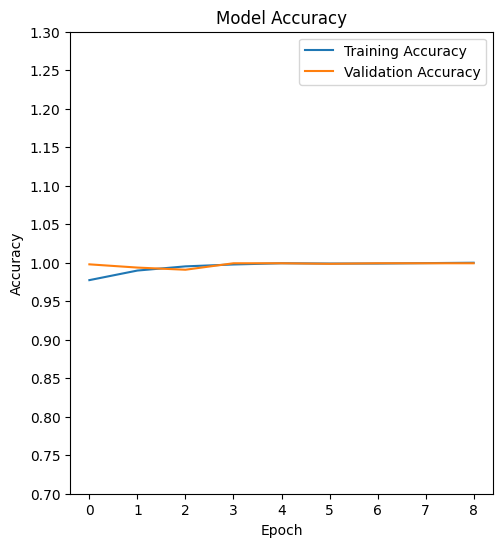

In [22]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.yticks(np.arange(0.7, 1.3, 0.05))
plt.legend()

plt.show()

### ✨ Result  
> Efficent B3 Model로 작업 시 정확도가 거의 100%에 수렴 하는 것을 볼 수 있으며, 매우 좋은 성능을 보입니다.

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


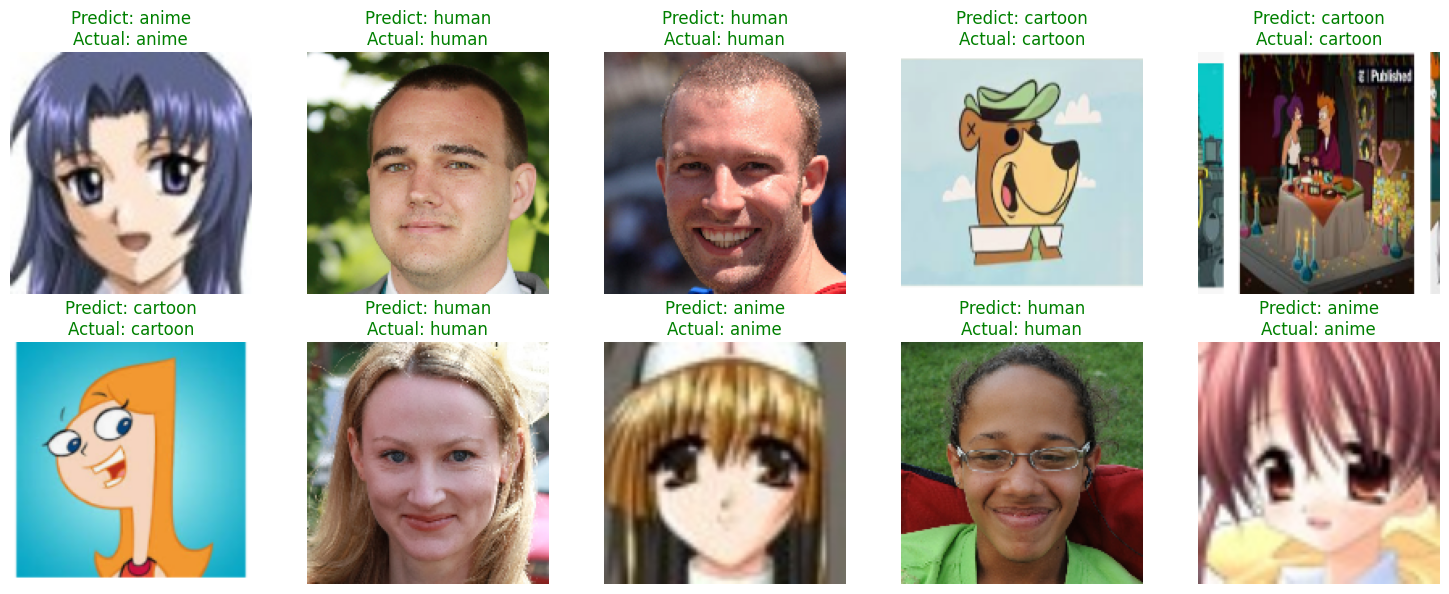

In [25]:
import random

def load_random_images_from_dataset(dataset, num_images=5):
    images = []
    labels = []
    
    # 데이터셋에서 무작위로 num_images개의 배치를 선택합니다.
    for _ in range(num_images):
        index = random.randint(0, len(dataset) - 1)
        img_batch, label_batch = dataset[index]
        images.append(img_batch[0])
        labels.append(label_batch[0])
    
    return images, labels

# 모델 예측 및 시각화 함수
def predict_and_visualize(images, labels, class_names, model):
    plt.figure(figsize=(15, 3 * len(images) // 5))  # 적절한 크기로 설정합니다.

    for idx, image in enumerate(images):
        predictions = model.predict(np.expand_dims(image, axis=0), batch_size=32)
        predicted_class = np.argmax(predictions[0])
        predicted_class_name = class_names[predicted_class]

        # 실제 클래스 이름
        actual_class = class_names[np.argmax(labels[idx])]

        # 예측이 실제와 일치하는지 여부에 따라 텍스트 색상 설정
        color = 'green' if predicted_class_name == actual_class else 'red'

        # 이미지 시각화 (전처리되지 않은 이미지로 시각화)
        original_image = image.astype('uint8')
        plt.subplot(len(images) // 5, 5, idx + 1)  # Nx5 그리드로 이미지 시각화
        plt.imshow(original_image)
        plt.title(f"Predict: {predicted_class_name}\nActual: {actual_class}", color=color)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# 클래스 이름 리스트
class_names = ['anime', 'cartoon', 'human']

# 무작위로 이미지 10개를 로드합니다.
random_images, random_labels = load_random_images_from_dataset(test_dataset, num_images=10)

# 각 이미지를 예측하고 결과를 시각화합니다.
predict_and_visualize(random_images, random_labels, class_names, model)


#### ✨ 데이터세트 내 이미지들을 통해 평가를 진행해본 결과 거의 100%에 가까운 정답률을 보입니다.

### 📌 Efficent Net이란 ?  

<img src="./images/efficentNet.png" width="600px">  


-  EfficientNet은 네트워크의 깊이를 깊게 하고, 채널의 길이(필터 수)를 늘리며, 입력 이미지의 해상도를 높이는 방식으로 모델의 성능을 향상시킨 모델입니다.

-  1. More Width (channel Width increase!)
   2. More Deep (Network Depth more deeper!)
   3. More Resolution Scaling (High-Resolution Image)
> 👦🏻 EfficentNet은 이 3가지의 최적의 조합을 AutoML을 통해 찾은 논문입니다. 그래서 위 조합을 효율적으로 만들 수 있도록 하는 compound scaling 방법을 제안하며 이를 통해 더 작은 크기의 모델로도 높은 성능을 보여준 모델입니다.

-  즉, EfficientNet은 모델의 크기와 복잡도를 동시에 증가시키면서도 효율적으로 성능을 극대화한 최신 딥러닝 모델입니다. 


### 🚩 1 Cycle Result - 2  
> EfficientNet 사전훈련 모델을 사용하여 해당 데이터셋을 훈련시킨 결과, 훈련 데이터, 검증 데이터, 테스트 데이터 모두에서 매우 우수한 성능을 보였습니다. 이는 해당 데이터셋이 EfficientNet 사전훈련 모델과의 유사도가 높음을 나타냅니다.
>
> 이러한 결과를 바탕으로, EfficientNet 사전훈련 모델을 활용하여 해당 데이터셋에 더 적합한 가중치를 학습할 수 있도록 Fine-tuning 기법을 적용하려고 합니다. 이러한 Fine-tuning을 통해 해당 데이터셋에 맞춘 최적의 성능을 달성할 수 있을 것입니다.

### 💡 2 Cycle
> EfficentNet 사전훈련 모델을 사용하여, Fine Tuning 사용

In [26]:
# 훈련된 모델의 layer 확인 
model.layers

[<InputLayer name=input_layer, built=True>,
 <Rescaling name=rescaling, built=True>,
 <Normalization name=normalization, built=True>,
 <Rescaling name=rescaling_1, built=True>,
 <ZeroPadding2D name=stem_conv_pad, built=True>,
 <Conv2D name=stem_conv, built=True>,
 <BatchNormalization name=stem_bn, built=True>,
 <Activation name=stem_activation, built=True>,
 <DepthwiseConv2D name=block1a_dwconv, built=True>,
 <BatchNormalization name=block1a_bn, built=True>,
 <Activation name=block1a_activation, built=True>,
 <GlobalAveragePooling2D name=block1a_se_squeeze, built=True>,
 <Reshape name=block1a_se_reshape, built=True>,
 <Conv2D name=block1a_se_reduce, built=True>,
 <Conv2D name=block1a_se_expand, built=True>,
 <Multiply name=block1a_se_excite, built=True>,
 <Conv2D name=block1a_project_conv, built=True>,
 <BatchNormalization name=block1a_project_bn, built=True>,
 <DepthwiseConv2D name=block1b_dwconv, built=True>,
 <BatchNormalization name=block1b_bn, built=True>,
 <Activation name=block1

In [27]:
model.layers[:69]

[<InputLayer name=input_layer, built=True>,
 <Rescaling name=rescaling, built=True>,
 <Normalization name=normalization, built=True>,
 <Rescaling name=rescaling_1, built=True>,
 <ZeroPadding2D name=stem_conv_pad, built=True>,
 <Conv2D name=stem_conv, built=True>,
 <BatchNormalization name=stem_bn, built=True>,
 <Activation name=stem_activation, built=True>,
 <DepthwiseConv2D name=block1a_dwconv, built=True>,
 <BatchNormalization name=block1a_bn, built=True>,
 <Activation name=block1a_activation, built=True>,
 <GlobalAveragePooling2D name=block1a_se_squeeze, built=True>,
 <Reshape name=block1a_se_reshape, built=True>,
 <Conv2D name=block1a_se_reduce, built=True>,
 <Conv2D name=block1a_se_expand, built=True>,
 <Multiply name=block1a_se_excite, built=True>,
 <Conv2D name=block1a_project_conv, built=True>,
 <BatchNormalization name=block1a_project_bn, built=True>,
 <DepthwiseConv2D name=block1b_dwconv, built=True>,
 <BatchNormalization name=block1b_bn, built=True>,
 <Activation name=block1

In [28]:
model.layers[:85]

[<InputLayer name=input_layer, built=True>,
 <Rescaling name=rescaling, built=True>,
 <Normalization name=normalization, built=True>,
 <Rescaling name=rescaling_1, built=True>,
 <ZeroPadding2D name=stem_conv_pad, built=True>,
 <Conv2D name=stem_conv, built=True>,
 <BatchNormalization name=stem_bn, built=True>,
 <Activation name=stem_activation, built=True>,
 <DepthwiseConv2D name=block1a_dwconv, built=True>,
 <BatchNormalization name=block1a_bn, built=True>,
 <Activation name=block1a_activation, built=True>,
 <GlobalAveragePooling2D name=block1a_se_squeeze, built=True>,
 <Reshape name=block1a_se_reshape, built=True>,
 <Conv2D name=block1a_se_reduce, built=True>,
 <Conv2D name=block1a_se_expand, built=True>,
 <Multiply name=block1a_se_excite, built=True>,
 <Conv2D name=block1a_project_conv, built=True>,
 <BatchNormalization name=block1a_project_bn, built=True>,
 <DepthwiseConv2D name=block1b_dwconv, built=True>,
 <BatchNormalization name=block1b_bn, built=True>,
 <Activation name=block1

In [29]:
# freeze 확인하기
for i, layer in enumerate(model.layers[:-5]):
    layer.trainable = False
    print(i + 1, '.', layer.name, 'trainable:', layer.trainable)

print('\n######### classifier layers ######### ')
for layer in model.layers[-5:]:
    print(layer.name, 'trainable:', layer.trainable)

1 . input_layer trainable: False
2 . rescaling trainable: False
3 . normalization trainable: False
4 . rescaling_1 trainable: False
5 . stem_conv_pad trainable: False
6 . stem_conv trainable: False
7 . stem_bn trainable: False
8 . stem_activation trainable: False
9 . block1a_dwconv trainable: False
10 . block1a_bn trainable: False
11 . block1a_activation trainable: False
12 . block1a_se_squeeze trainable: False
13 . block1a_se_reshape trainable: False
14 . block1a_se_reduce trainable: False
15 . block1a_se_expand trainable: False
16 . block1a_se_excite trainable: False
17 . block1a_project_conv trainable: False
18 . block1a_project_bn trainable: False
19 . block1b_dwconv trainable: False
20 . block1b_bn trainable: False
21 . block1b_activation trainable: False
22 . block1b_se_squeeze trainable: False
23 . block1b_se_reshape trainable: False
24 . block1b_se_reduce trainable: False
25 . block1b_se_expand trainable: False
26 . block1b_se_excite trainable: False
27 . block1b_project_conv t

In [30]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import EfficientNetB3

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'efficentnet':
        model = EfficientNetB3(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(500, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.3)(x)
    output = Dense(3, activation='softmax', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [31]:
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='efficentnet', verbose=True)
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_2         │ (None, 150, 150,  │          0 │ input_layer_1[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 150, 150,  │          7 │ rescaling_2[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_3         │ (None, 150, 150,  │          0 │ normalization_1[… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 151, 151,  │          0 │ rescaling_3[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 75, 75,    │      1,080 │ stem_conv_pad[0]… │
│                     │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 75, 75,    │        160 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 75, 75,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 75, 75,    │        360 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 75, 75,    │        160 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 75, 75,    │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 40)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 40)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 10)  │        410 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 40)  │        440 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 75, 75,    │          0 │ block1a_activati… │
│ (Multiply)          │ 40)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 75, 75,    │        960 │ block1a_se_excit

 Total params: 11,553,538 (44.07 MB)

 Trainable params: 11,466,235 (43.74 MB)

 Non-trainable params: 87,303 (341.03 KB)

In [32]:
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.applications.efficientnet import preprocess_input 
from tensorflow.keras import layers

IMAGE_SIZE = 150
BATCH_SIZE = 32

def fine_tune(datas, model_name, aug, preprocess):
    FIRST_EPOCHS = 10
    SECOND_EPOCHS = 10
    
    train_file_paths, train_targets, \
    validation_file_paths, validation_targets, \
    test_file_paths, test_targets = datas

    train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=preprocess_input, 
                        shuffle=True)

    validation_dataset = Dataset(validation_file_paths, 
                            validation_targets, 
                            batch_size=BATCH_SIZE, 
                            preprocess=preprocess_input)
    
    
    model = create_model(model_name=model_name, verbose=True)
    model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

    # feature extractor layer들을 전부 freeze
    for layer in model.layers[:-5]:
        layer.trainable = False

    model.fit(train_dataset, 
              batch_size=BATCH_SIZE, 
              epochs=FIRST_EPOCHS, 
              validation_data=validation_dataset)

    # 배치 정규화만 freeze 진행
    for layer in model.layers:
        layer.trainable = False
        if not isinstance(layer, layers.BatchNormalization):
            layer.trainable = True

    # # 부분 freeze 진행
    for layer in model.layers[:85]:
        layer.trainable = False


    
    model.compile(optimizer=Adam(0.00001), loss=CategoricalCrossentropy(), metrics=['acc'])
    history = model.fit(train_dataset, 
              batch_size=BATCH_SIZE, 
              epochs=SECOND_EPOCHS, 
              validation_data=validation_dataset)
    
    return model, history

### 💡 처음 85개의 층을 freeze 하였습니다.  
> 총 3번의 시도 결과 , 100개의 층을 freeze 하였을 때, 성능이 가장 좋았기 때문입니다.

In [33]:
import albumentations as A
from tensorflow.keras.applications.efficientnet import preprocess_input as efficent_preprocess_input


train_file_paths = train_df['file_paths'].values
# train_targets = train_df['targets'].values # SparseCategoricalCrossEntropy
train_targets = pd.get_dummies(train_df['targets']).values # CategoricalCrossEntropy

validation_file_paths = validation_df['file_paths'].values
# validation_targets = validation_df['targets'].values # SparseCategoricalCrossEntropy
validation_targets = pd.get_dummies(validation_df['targets']).values # CategoricalCrossEntropy

test_file_paths = test_df['file_paths'].values
# test_targets = test_df['targets'].values # SparseCategoricalCrossEntropy
test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy

model, history = fine_tune((train_file_paths, train_targets,
                            validation_file_paths, validation_targets,
                            test_file_paths, test_targets),
                            'efficentnet', 
                           aug=None,
                            preprocess=efficent_preprocess_input)

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_4         │ (None, 150, 150,  │          0 │ input_layer_2[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_2     │ (None, 150, 150,  │          7 │ rescaling_4[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_5         │ (None, 150, 150,  │          0 │ normalization_2[… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 151, 151,  │          0 │ rescaling_5[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 75, 75,    │      1,080 │ stem_conv_pad[0]… │
│                     │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 75, 75,    │        160 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 75, 75,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 75, 75,    │        360 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 75, 75,    │        160 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 75, 75,    │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 40)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 40)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 10)  │        410 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 40)  │        440 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 75, 75,    │          0 │ block1a_activati… │
│ (Multiply)          │ 40)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 75, 75,    │        960 │ block1a_se_excit

 Total params: 11,553,538 (44.07 MB)

 Trainable params: 11,466,235 (43.74 MB)

 Non-trainable params: 87,303 (341.03 KB)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 216s 874ms/step - acc: 0.9441 - loss: 0.1242 - val_acc: 0.9965 - val_loss: 0.0136
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 104s 561ms/step - acc: 0.9985 - loss: 0.0080 - val_acc: 0.9944 - val_loss: 0.0091
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 104s 565ms/step - acc: 0.9972 - loss: 0.0099 - val_acc: 0.9944 - val_loss: 0.0132
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 104s 558ms/step - acc: 0.9921 - loss: 0.0246 - val_acc: 0.9965 - val_loss: 0.0143
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 105s 572ms/step - acc: 0.9948 - loss: 0.0166 - val_acc: 0.9986 - val_loss: 0.0063
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 107s 578ms/step - acc: 0.9964 - loss: 0.0148 - val_acc: 0.9965 - val_loss: 0.0085
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 104s 562ms/step - acc: 0.9973 - loss: 0.0080 - val_acc: 0.9979 - val_loss: 0.0068
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 105s 565ms/step - acc: 0.9981 - loss: 0.0061 - val_acc: 0.9972 - val_loss: 0.0088
Epoch 9/10
179/179 ━━━━━━━━━━━━━━━━

In [34]:
model.evaluate(test_dataset, batch_size=BATCH_SIZE)

56/56 ━━━━━━━━━━━━━━━━━━━━ 31s 557ms/step - acc: 0.9995 - loss: 8.6166e-04


[0.0008960823179222643, 0.9994394779205322]

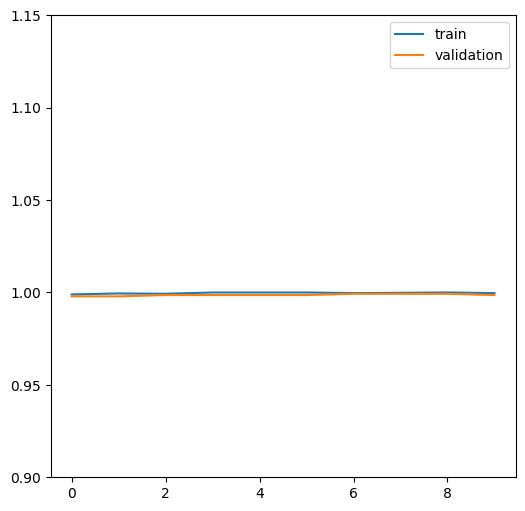

In [42]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1.2, 0.05))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.ylim(0.9, 1.15)
    plt.legend()
    
show_history(history)

### ✨ 2 Cycle Result  
- fine tuning 결과 기존 훈련 속도보다 5초가량 더 빠르게 된 것을 알 수 있었으며, 모든 데이터의 성능 차이또한 크지 않았으며, 기존 사전훈련모델 훈련 결과와 비슷하게 매우 좋은 성능을 보여줌을 알 수 있었습니다.

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


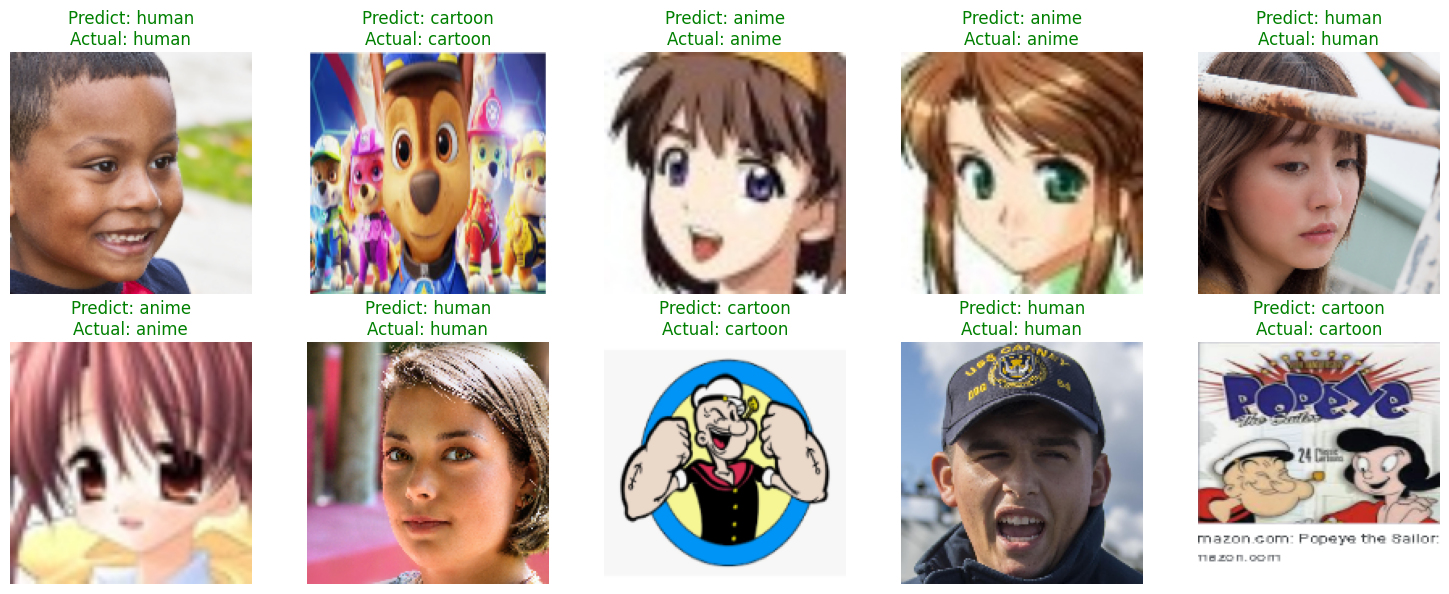

In [43]:
import random

def load_random_images_from_dataset(dataset, num_images=5):
    images = []
    labels = []
    
    # 데이터셋에서 무작위로 num_images개의 배치를 선택합니다.
    for _ in range(num_images):
        index = random.randint(0, len(dataset) - 1)
        img_batch, label_batch = dataset[index]
        images.append(img_batch[0])
        labels.append(label_batch[0])
    
    return images, labels

# 모델 예측 및 시각화 함수
def predict_and_visualize(images, labels, class_names, model):
    plt.figure(figsize=(15, 3 * len(images) // 5))  # 적절한 크기로 설정합니다.

    for idx, image in enumerate(images):
        predictions = model.predict(np.expand_dims(image, axis=0), batch_size=32)
        predicted_class = np.argmax(predictions[0])
        predicted_class_name = class_names[predicted_class]

        # 실제 클래스 이름
        actual_class = class_names[np.argmax(labels[idx])]

        # 예측이 실제와 일치하는지 여부에 따라 텍스트 색상 설정
        color = 'green' if predicted_class_name == actual_class else 'red'

        # 이미지 시각화 (전처리되지 않은 이미지로 시각화)
        original_image = image.astype('uint8')
        plt.subplot(len(images) // 5, 5, idx + 1)  # Nx5 그리드로 이미지 시각화
        plt.imshow(original_image)
        plt.title(f"Predict: {predicted_class_name}\nActual: {actual_class}", color=color)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# 클래스 이름 리스트
class_names = ['anime', 'cartoon', 'human']

# 무작위로 이미지 10개를 로드합니다.
random_images, random_labels = load_random_images_from_dataset(test_dataset, num_images=10)

# 각 이미지를 예측하고 결과를 시각화합니다.
predict_and_visualize(random_images, random_labels, class_names, model)


### ✨ Fine Tuning 결과도 마찬가지로 모든 이미지 평가에 대해서 100% 정답율을 보여주었습니다.

### 🚩 느낀점  
> 이번에 애니메이션, 카툰, 인간의 이미지에 대한 CNN 분류 프로젝트를 하면서, 꽤 독특한 주제였기도 하였고, 흥미가 갔었기 때문에, 재밌게 작업을 한 프로젝트이기도 합니다.
>
> 그리고 최신에 발표된 EfficentNet 사전훈련모델을 사용하면서, 매우 좋은 성능을 보여주었다보니까, 궁금증이 생겨서 EfficentNet에 대한 논문도 읽고 이러한 사전훈련모델에 대한 지식도 학습할 수 있게 되어서 뜻 깊은 프로젝트가 되었습니다.
>
> EfficentNet에 대해 알게 된 점은 다음과 같습니다.
> 
> 1. 균형 잡힌 모델 확장 : EfficientNet은 모델의 깊이, 너비, 해상도를 균형 있게 확장하여 성능을 극대화합니다.
> 2. 효율성 : 비슷한 성능을 내는 다른 모델들에 비해 파라미터 수와 연산량이 크게 줄어들어, 더 효율적인 학습과 추론이 가능합니다.
> 3. 적응력 : 다양한 데이터셋과 문제에 대해 높은 성능을 유지하면서도, 특정 데이터셋에 맞춰 미세 조정이 용이합니다.
>
> 👦🏻 이러한 점들을 통해 EfficentNet이 왜 최신 딥러닝 모델 중에서 주목받고 있는지, 이해할 수 있었고, 앞으로의 프로젝트에서도 이를 활용할 계획입니다.